Breast cancer is the second most common cancer in women and men worldwide. In 2012, it represented about 12 percent of all new cancer cases and 25 percent of all cancers in women.


Breast cancer starts when cells in the breast begin to grow out of control. These cells usually form a tumor that can often be seen on an x-ray or felt as a lump. The tumor is malignant (cancer) if the cells can grow into (invade) surrounding tissues or spread (metastasize) to distant areas of the body.

### Breast Cancer Classification

We have to build a model to classify patients with Breast Cancer by studying the Biopsy Images

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from cancer_detection_model import CancerModel
import project_configuration as conf

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam
from keras.utils import np_utils

import numpy as np
import os
# import argparse
from imutils import paths

Using TensorFlow backend.
W0927 15:17:58.733530  5204 deprecation_wrapper.py:119] From C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0927 15:17:58.754475  5204 deprecation_wrapper.py:119] From C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0927 15:17:58.760457  5204 deprecation_wrapper.py:119] From C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0927 15:17:58.805336  5204 deprecation_wrapper.py:119] From C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_ses

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 24, 34, 32)        155       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 34, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 34, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 17, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 17, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 12, 17, 64)        2400      
_________________________________________________________________
activation_2 (Activation)    (None, 12, 17, 64)        0         
__________

In [2]:
# Prepare for training of the model

NR_EPOCHS = 10
LEARNING_RATE = 1e-2 # lr = 0.01
BATCH_SIZE = 32

# Lets find the total size of each split
all_training_paths = list(paths.list_images(conf.TRAIN_PATH))
total_training_examples = len(all_training_paths)

all_validation_paths = list(paths.list_images(conf.VAL_PATH))
total_validation_examples = len(all_validation_paths)

all_testing_paths = list(paths.list_images(conf.TEST_PATH))
total_testing_examples = len(all_testing_paths)

print('Total training paths :',total_training_examples)
print('Total testing paths :',total_testing_examples)
print('Total validation paths :',total_validation_examples)



Total training paths : 194267
Total testing paths : 55505
Total validation paths : 27752


In [3]:
# Let's check the balance of the labeled Data
training_labels = [ int(p.split(os.path.sep)[-2]) for p in all_training_paths]

# One-Hot Encoding for Categorical labels
training_labels = np_utils.to_categorical(training_labels)

class_totals = training_labels.sum(axis = 0)
class_weight = class_totals.max() / class_totals

class_weight



array([1.       , 2.5151904], dtype=float32)

In [4]:
# Data Augmentation
train_data_aug = ImageDataGenerator(rescale=1/255.0,
                                    rotation_range=20,
                                    zoom_range=0.05,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.05,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='nearest')

test_data_aug = ImageDataGenerator(rescale=1/255.0)
val_data_aug = ImageDataGenerator(rescale=1/255.0)

# Initialize the augmentation generators

train_generator = train_data_aug.flow_from_directory(
                                    directory = conf.TRAIN_PATH,
                                    class_mode = 'categorical',
                                    target_size = (48,48),
                                    color_mode = 'rgb',
                                    shuffle = True,
                                    batch_size = BATCH_SIZE)

validation_generator = val_data_aug.flow_from_directory(
                                    directory = conf.VAL_PATH,
                                    class_mode = 'categorical',
                                    target_size = (48,48),
                                    color_mode = 'rgb',
                                    shuffle = False,
                                    batch_size = BATCH_SIZE)

test_generator = test_data_aug.flow_from_directory(
                                    directory = conf.TEST_PATH,
                                    class_mode = 'categorical',
                                    target_size = (48,48),
                                    color_mode = 'rgb',
                                    shuffle = False,
                                    batch_size = BATCH_SIZE)

Found 194267 images belonging to 2 classes.
Found 27752 images belonging to 2 classes.
Found 55505 images belonging to 2 classes.


In [5]:
# Compile the model
image_shape = (48,48,3)
model = CancerModel.build(image_shape = image_shape , classes= 2)
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(lr = LEARNING_RATE ,decay = LEARNING_RATE / NR_EPOCHS ),
              metrics = ['accuracy'])

W0927 15:18:39.607381  5204 deprecation_wrapper.py:119] From C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0927 15:18:39.634310  5204 deprecation.py:323] From C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# Let's check our model's Architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_7 (Separabl (None, 48, 48, 32)        155       
_________________________________________________________________
activation_9 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 24, 24, 64)        2400      
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 64)        0         
__________

In [7]:
# Start training
model.fit_generator(generator=train_generator,
                    steps_per_epoch=total_training_examples // BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=total_validation_examples // BATCH_SIZE,
                    class_weight=class_weight,
                    epochs=NR_EPOCHS,
                    workers = 5)

Epoch 1/10
6070/6070 [==============================] - 1670s 275ms/step - loss: 0.3703 - acc: 0.8418 - val_loss: 0.3455 - val_acc: 0.8574
Epoch 2/10
6070/6070 [==============================] - 1913s 315ms/step - loss: 0.3272 - acc: 0.8619 - val_loss: 0.3219 - val_acc: 0.8710
Epoch 3/10
6070/6070 [==============================] - 1685s 278ms/step - loss: 0.3145 - acc: 0.8681 - val_loss: 0.2900 - val_acc: 0.8792
Epoch 4/10
6070/6070 [==============================] - 1975s 325ms/step - loss: 0.3074 - acc: 0.8714 - val_loss: 0.3020 - val_acc: 0.8692
Epoch 5/10
6070/6070 [==============================] - 2102s 346ms/step - loss: 0.3018 - acc: 0.8736 - val_loss: 0.2786 - val_acc: 0.8826
Epoch 6/10
6070/6070 [==============================] - 1832s 302ms/step - loss: 0.2980 - acc: 0.8751 - val_loss: 0.3057 - val_acc: 0.8751
Epoch 7/10
6070/6070 [==============================] - 1912s 315ms/step - loss: 0.2953 - acc: 0.8762 - val_loss: 0.2831 - val_acc: 0.8838
Epoch 8/10
6070/6070 [=====

In [26]:
from keras.models import save_model
save_model(model,'model.h5')

In [27]:
model_history = model.history.history
for key in model_history.keys():
    print(key)

val_loss
val_acc
loss
acc


In [28]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

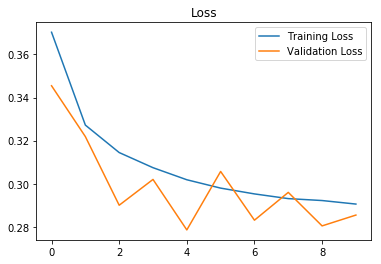

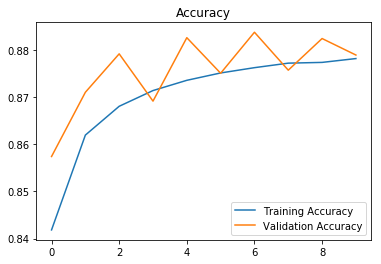

In [29]:
plot_metrics(model_history)